#

# Titanic assessment

1. Importing data and python packages 
2. Assessing Data Quality and Missing Values 
3. Exploratory Analysis 
4. Logistic Regression

### 1. Importing packages


In [1]:
import numpy as np
import pandas as pd 

# from this kaggle task: 
# https://www.kaggle.com/competitions/titanic/overview

from sklearn import preprocessing 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix 
import seaborn as sns
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score





CSV documents into dataframes

In [2]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')
gender_df = pd.read_csv('gender_submission.csv')

### 2. Assessing data quality and Missing Values 

2.1 Training dataset

In [3]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
train_df['Age'].median()
print('Percent of missing age records is %.2f%%'%((train_df['Age'].isnull().sum()/train_df.shape[0]*100)))
print('The median of the age records is:', train_df['Age'].median())
train_df['Cabin'].mode()
print('Percent of missing cabin records is %.2f%%'%((train_df['Cabin'].isnull().sum()/train_df.shape[0]*100)))
train_df['Embarked'].mode()
print('Percent of missing embarked records is %.2f%%'%((train_df['Embarked'].isnull().sum()/train_df.shape[0]*100)))
print('The most common vale for embarked data is:', train_df['Embarked'].mode())


Percent of missing age records is 19.87%
The median of the age records is: 28.0
Percent of missing cabin records is 77.10%
Percent of missing embarked records is 0.22%
The most common vale for embarked data is: 0    S
Name: Embarked, dtype: object


###### We can replace age and the embarked data with the most common values and the median. However, for the cabin data as 77% of the data is missing therefore I will remove this column and ignore it in my data analysis

Replacing missing values for 'Age' and 'Embarked' column

In [5]:
train_ad=train_df.copy()
#Replacing missing age values with the median
train_ad['Age']=train_df['Age'].fillna(train_df['Age'].median()) #Replace Nas wih the median age 
#Replacing missing Embarked values with the mode 
train_ad['Embarked']=train_df['Embarked'].fillna(train_df['Embarked'].value_counts().idxmax()) #Replace Nas with the most common value 
train_ad.isnull().sum()
#Removing the cabin column from the data set 
train_ad.drop('Cabin', axis=1, inplace = True) #Remove the cabin column from the new data set 
train_ad.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

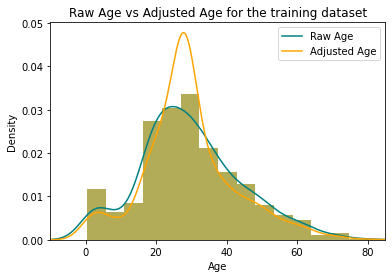

In [6]:
fig, ax=plt.subplots()

ax=train_df['Age'].hist(bins=15, density = True, stacked = True, color='teal',alpha=0.6)
train_df['Age'].plot(kind='density', color='teal')
ax=train_df['Age'].hist(bins =15, density = True, stacked= True, color='orange',alpha=0.5)
train_ad['Age'].plot(kind = 'density', color='orange')
ax.legend(['Raw Age','Adjusted Age'])
ax.set(xlabel='Age')
ax.set_title('Raw Age vs Adjusted Age for the training dataset')
plt.xlim(-10,85)
plt.show()





###### The above graph shows us that replacing the missing values in the age column with the median age (28) doesn't change significantly the shape of the density plot. The main change is at the level of the median age which is normal as for the adjusted age there are more median age values.

2.2 Test dataset

In [7]:
test_df.isnull().sum()
test_ad=test_df.copy()
#Replacing missing age values with the median
test_ad['Age']=test_df['Age'].fillna(test_df['Age'].median()) #Replace Nas wih the median age 
#Replacing Embarked missing values with the most common feature
test_ad['Embarked']=test_df['Embarked'].fillna(test_df['Embarked'].value_counts().idxmax()) #Replace Nas with the most common value 

test_ad.drop('Cabin', axis=1, inplace = True)
test_ad.isnull().sum()


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

###### In the test data there is also one fare that is missing

In [8]:
print('Percentage of missing fare is %.2f%%'%(test_df['Fare'].isnull().sum()/test_df.shape[0]*100))
test_df['Fare'].median()
print('The median Fare is:',test_df['Fare'].median())
test_ad['Fare']=test_df['Fare'].fillna(test_df['Fare'].median())
test_ad.isnull().sum()

Percentage of missing fare is 0.24%
The median Fare is: 14.4542


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### 3. Exploratory analysis

3.1 Survival vs age 

Text(0.5, 1.0, 'Density plot demonstrating survival rates depending on age of passengers')

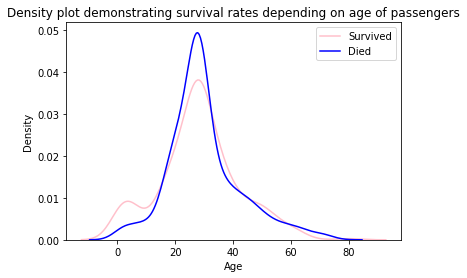

In [9]:
# Survived vs Age 
#Survived vs Sex
#Survived vs Fare 
#Survived vs PClass

#Survived vs age 


#Rate of Survival for age data
ax=sns.kdeplot(train_ad['Age'][train_ad.Survived==1],color='pink')
ax=sns.kdeplot(train_ad['Age'][train_ad.Survived ==0], color='blue')
plt.legend(['Survived','Died'])
plt.title('Density plot demonstrating survival rates depending on age of passengers')



###### What can be seen from the data is that young people under the age of approx 16 years old had higher survival rates compared to the rest of the population

3.2 Survival vs Ticket fare 

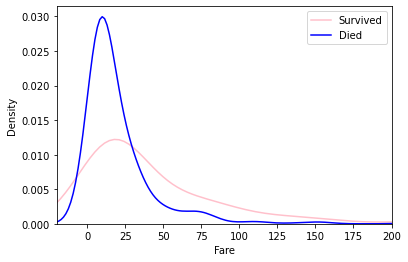

In [10]:
#Survived vs price of ticket 
ax=sns.kdeplot(train_ad['Fare'][train_ad.Survived==1],color='pink')
ax=sns.kdeplot(train_ad['Fare'][train_ad.Survived==0], color='blue')
plt.legend(['Survived','Died'])
plt.xlim(-20,200)


Pcclass=train_ad.loc[train_ad['Pclass']==3]
Pcclass=Pcclass['Fare'].max() 






###### The minimum price for all the 3 classes is 0 --> could reduce the predictive power of the model if I add this column in my logistic regression
###### The maximum price for class 1 is 512, max for class 2 is 73 and max for class 3 is 69.55

3.3 Rate of survival vs Class

###### First class passengers had a higher rate of survival

3.4 Rate of survival vs gender

###### Obvious correlation between survival and gender

In [11]:
train_ad['Sex'].replace('female',0,inplace=True)
train_ad['Sex'].replace('male',1 ,inplace=True)
train_ad['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

### 3. Linear regression

In [12]:
x = train_ad.iloc[:,[5]].values #Using sex for predictive modeling

y=train_ad.iloc[:,1].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)


logreg=LinearRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
# accuracy_score(y_pred,y_test)
print('The predictive score of this model is',logreg.score(X_test,y_test))

The predictive score of this model is -0.000998078298130034


### 4. Logistic regression

In [13]:
train_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [14]:

X = train_ad.iloc[:,[2,4,5]].values #Using Pclass, sex, age for predictive modeling

y=train_ad.iloc[:,1].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.75, random_state=2)

logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
# accuracy_score(y_pred,y_test)
print('The predictive score of this model is',logreg.score(X_test,y_test))



The predictive score of this model is 0.6158445440956651


AUC: 0.500000
F score: 0.000000


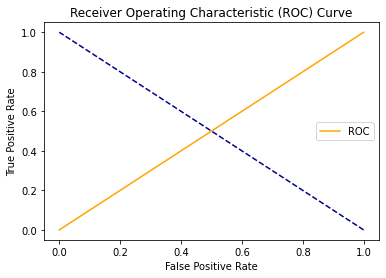

In [15]:
auc = roc_auc_score(y_test,y_pred)
print('AUC: %f' %auc)

fpr, tpr = roc_curve(y_test,y_pred)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([1,0],[0,1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
fscore=f1_score(y_test,y_pred)
print('F score: %f' %fscore)
plt.legend()
plt.show()